Instituto Politécnico Nacional

Centro de Investigación en Computación

Minería de datos I

Programación de algoritmos de Clustering.
1. KMeans

Presenta: Ana Maritza Bello

---

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
data = pd.read_csv('../data/trajectories.csv')
data = data.drop(['id'],axis = 1)

df = pd.DataFrame(data)

In [56]:
df['month'] = df['date'].apply(lambda x: x.split('-')[1])
df['month'] = df['month'].astype(int)
df['year'] = df['date'].apply(lambda x: x.split('-')[0])
df['year'] = df['year'].astype(int)

In [57]:
# Transform categorical variables into one-hot encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['season'] = le.fit_transform(df['season'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176767 entries, 0 to 176766
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   name                          176767 non-null  object 
 1   spheroid_dist_to_colony       176767 non-null  float64
 2   sst                           176766 non-null  float64
 3   wnd_ucmp_height_above_ground  176767 non-null  float64
 4   wnd_vcmp_height_above_ground  176657 non-null  float64
 5   date                          176767 non-null  object 
 6   season                        176767 non-null  int64  
 7   latitude                      176767 non-null  float64
 8   longitude                     176767 non-null  float64
 9   month                         176767 non-null  int64  
 10  year                          176767 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 14.8+ MB


In [58]:
rows = df.isna().any(axis=1)
rows = rows[rows == True]
df.dropna(inplace=True)
rows = df.isna().any(axis=1)
df.isna().sum()

name                            0
spheroid_dist_to_colony         0
sst                             0
wnd_ucmp_height_above_ground    0
wnd_vcmp_height_above_ground    0
date                            0
season                          0
latitude                        0
longitude                       0
month                           0
year                            0
dtype: int64

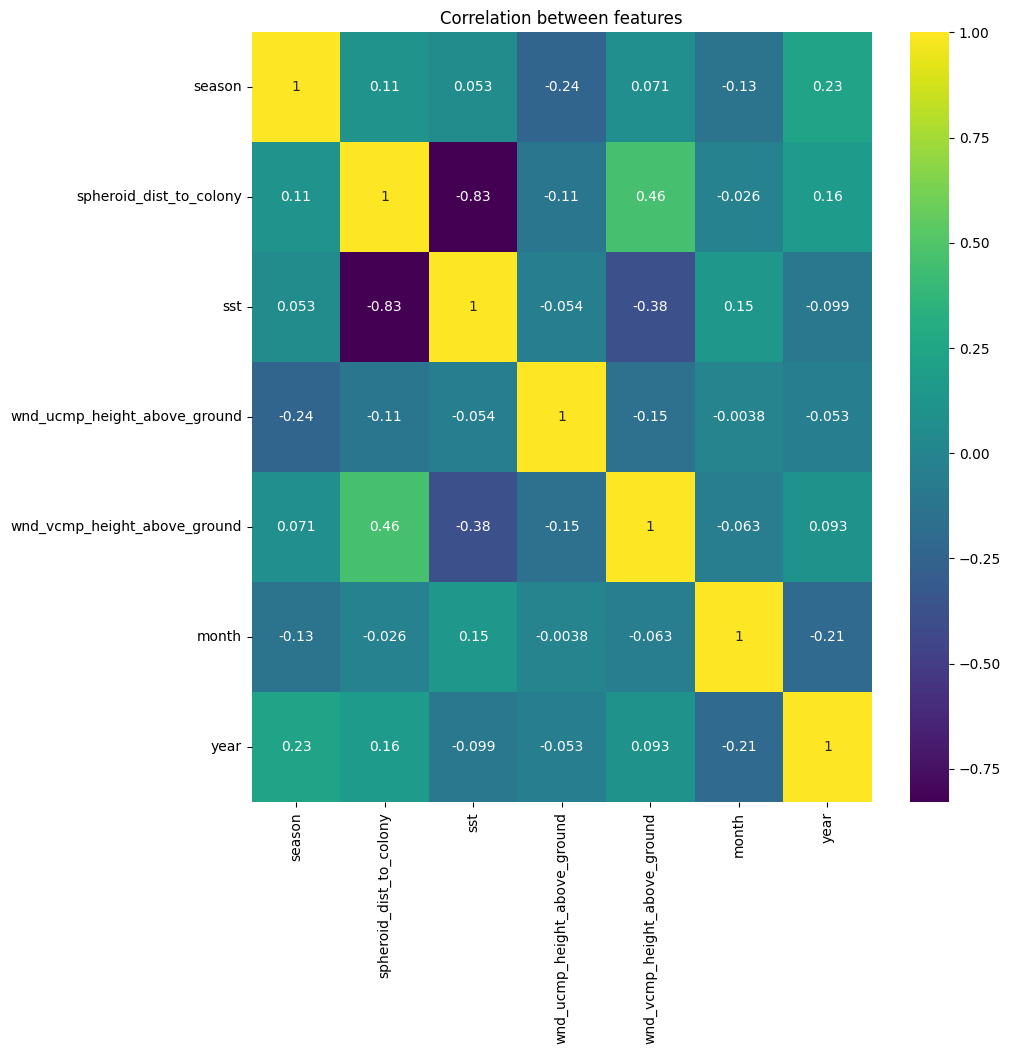

In [59]:
# Correlation between features
feature_cols = ['season', 'spheroid_dist_to_colony', 'sst', 'wnd_ucmp_height_above_ground', 'wnd_vcmp_height_above_ground', 'month', 'year']
corr = df[feature_cols].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title('Correlation between features')
plt.show()

In [60]:
from sklearn.model_selection import train_test_split

# Multitarget array
y = df[['longitude', 'latitude']].values

# Features
cols_to_drop = ['latitude', 'longitude', 'name', 'date']
X = df.drop(cols_to_drop, axis = 1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(" X_train shape: ", X_train.shape, "\n",
      "y_train shape: ", y_train.shape, "\n",
      "X_test shape: ", X_test.shape, "\n",
      "y_test shape: ", y_test.shape)

 X_train shape:  (141324, 7) 
 y_train shape:  (141324, 2) 
 X_test shape:  (35332, 7) 
 y_test shape:  (35332, 2)


In [61]:
from sklearn.multioutput import MultiOutputRegressor
from scipy.cluster.hierarchy import linkage, fcluster

coordinates = df[['longitude', 'latitude']].values
coordinates = coordinates[::100]
coordinates = pd.DataFrame(coordinates, columns=['longitude', 'latitude'])

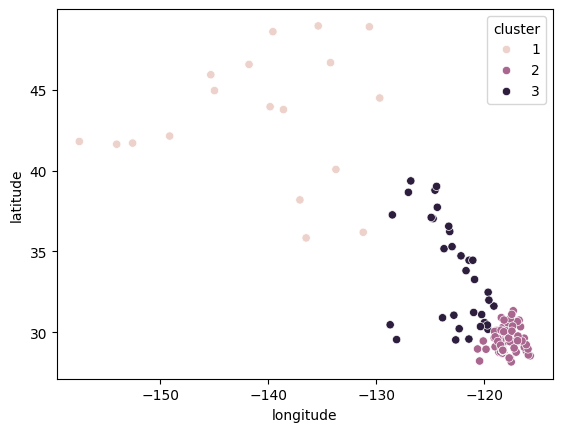

In [62]:
Z = linkage(coordinates, method='ward', metric='euclidean')
coordinates['cluster'] = fcluster(Z, 3, criterion='maxclust')

sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=coordinates)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='longitude', ylabel='latitude'>

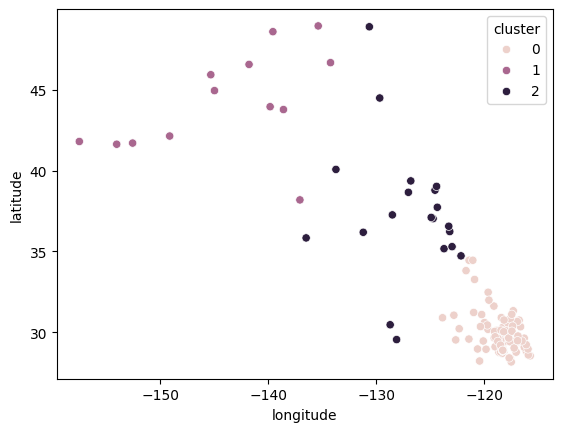

In [63]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(coordinates)
coordinates['cluster'] = kmeans.predict(coordinates)

sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=coordinates)
